# Lista 2 - Econometria II
---

> Alunos: Henrique Castilho Del'Esposti, Luciana de Paula Thomasi, Paola Scheidegger Fregona e Renan Rodrigues Torres.

# Importando bibliotecas

In [35]:
import pandas as pd
import numpy as np 
import statsmodels.formula.api as smf 
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns 
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.stattools import adfuller

import patsy as pt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay

# Questão 1

## a) 

In [36]:
dados2021_em = pd.read_excel('../dados-listas/dados2021_em.xlsx')
dados2021_em

,abandono,ID_ETAPA_MATRICULA,IDADE,TP_SEXO,NOTA_ESCOLA_TRI1PT,NOTA_ESCOLA_TRI1MT,ID_TURNO,NOTA_TURMA_TRI1PT,NOTA_TURMA_TRI1MT,lp_1_tri,...,PROP_FALTA_TRI1PT,PROP_FALTA_TRI1MT,PROP_FALTA_TRI1HIS,PROP_FALTA_TRI1GEO,PROP_FALTA_TRI1BIO,PROP_FALTA_TRI1QUI,PROP_FALTA_TRI1FIS,CD_INEP_ALUNO,CD_INEP_ESC,NOME_ESCOLA
0,1,16,21,M,16.788265,17.741026,3,11.937982,13.673091,5.973872,...,0.243902,0.756211,0.635003,1.261186,2.186294,0.572896,0.940507,1449,1860,Canarinhos
1,1,17,19,F,16.270563,17.573276,2,20.875212,19.473957,9.973872,...,0.588235,0.667322,0.429616,1.078850,1.874328,0.867768,1.023128,1675,1640,Ipiranga
2,1,17,20,M,18.363636,20.642512,1,21.476164,17.748243,2.973872,...,0.365385,1.056211,1.065980,1.348080,2.126854,0.834801,1.256645,1763,1640,Ipiranga
3,1,16,20,M,14.360526,15.142857,1,14.360815,14.909173,5.973872,...,0.439394,0.974122,0.646399,1.540388,2.263217,0.813637,1.149502,1734,1860,Canarinhos
4,1,17,21,F,18.788321,19.963504,1,18.562616,19.833404,6.973872,...,0.433962,1.017750,0.793252,1.372297,2.013217,0.697896,1.100051,1350,1640,Ipiranga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,0,18,19,M,18.570403,21.364238,2,20.512262,18.017511,29.973872,...,0.085106,0.628938,0.338707,1.001926,1.763217,0.441944,0.792359,1261,1420,Dom Pedro II
820,0,18,19,M,18.570403,21.364238,2,21.208545,17.735862,21.973872,...,0.040816,0.592575,0.338707,1.001926,1.763217,0.441944,0.792359,2009,1420,Dom Pedro II
821,0,18,19,M,19.564220,20.176923,1,21.545638,20.906191,17.973872,...,0.269231,0.820362,0.422040,1.293593,1.863217,0.593729,0.832359,1642,1420,Dom Pedro II
822,0,18,19,M,16.329173,18.391850,1,17.779974,15.807290,15.973872,...,0.250000,0.763758,0.526207,1.121926,2.032448,0.620515,0.899502,1707,1310,Maestro Guerra Peixe


In [37]:
# Criando dicionário para transformar o sexo em variável dummy

tp_sexo = {
    'F' : 1,
    'M' : 0
}

# Atribuindo as dummies 

dados2021_em['sexo_dummy'] = dados2021_em['TP_SEXO'].map(tp_sexo)
dados2021_em

,abandono,ID_ETAPA_MATRICULA,IDADE,TP_SEXO,NOTA_ESCOLA_TRI1PT,NOTA_ESCOLA_TRI1MT,ID_TURNO,NOTA_TURMA_TRI1PT,NOTA_TURMA_TRI1MT,lp_1_tri,...,PROP_FALTA_TRI1MT,PROP_FALTA_TRI1HIS,PROP_FALTA_TRI1GEO,PROP_FALTA_TRI1BIO,PROP_FALTA_TRI1QUI,PROP_FALTA_TRI1FIS,CD_INEP_ALUNO,CD_INEP_ESC,NOME_ESCOLA,sexo_dummy
0,1,16,21,M,16.788265,17.741026,3,11.937982,13.673091,5.973872,...,0.756211,0.635003,1.261186,2.186294,0.572896,0.940507,1449,1860,Canarinhos,0
1,1,17,19,F,16.270563,17.573276,2,20.875212,19.473957,9.973872,...,0.667322,0.429616,1.078850,1.874328,0.867768,1.023128,1675,1640,Ipiranga,1
2,1,17,20,M,18.363636,20.642512,1,21.476164,17.748243,2.973872,...,1.056211,1.065980,1.348080,2.126854,0.834801,1.256645,1763,1640,Ipiranga,0
3,1,16,20,M,14.360526,15.142857,1,14.360815,14.909173,5.973872,...,0.974122,0.646399,1.540388,2.263217,0.813637,1.149502,1734,1860,Canarinhos,0
4,1,17,21,F,18.788321,19.963504,1,18.562616,19.833404,6.973872,...,1.017750,0.793252,1.372297,2.013217,0.697896,1.100051,1350,1640,Ipiranga,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,0,18,19,M,18.570403,21.364238,2,20.512262,18.017511,29.973872,...,0.628938,0.338707,1.001926,1.763217,0.441944,0.792359,1261,1420,Dom Pedro II,0
820,0,18,19,M,18.570403,21.364238,2,21.208545,17.735862,21.973872,...,0.592575,0.338707,1.001926,1.763217,0.441944,0.792359,2009,1420,Dom Pedro II,0
821,0,18,19,M,19.564220,20.176923,1,21.545638,20.906191,17.973872,...,0.820362,0.422040,1.293593,1.863217,0.593729,0.832359,1642,1420,Dom Pedro II,0
822,0,18,19,M,16.329173,18.391850,1,17.779974,15.807290,15.973872,...,0.763758,0.526207,1.121926,2.032448,0.620515,0.899502,1707,1310,Maestro Guerra Peixe,0


In [38]:
dados2021_em_2ano = dados2021_em[dados2021_em['ID_ETAPA_MATRICULA'] == 17]
dados2021_em_2ano['ID_ETAPA_MATRICULA'].value_counts() # contando a quantidade por tipo de matrícula, para conferir se o novo dataframe contém apenas 
                                                       # ID_ETAPA_MATRICULA = 17

17    320
Name: ID_ETAPA_MATRICULA, dtype: int64

In [92]:
dados2021_em_2ano

,abandono,ID_ETAPA_MATRICULA,IDADE,TP_SEXO,NOTA_ESCOLA_TRI1PT,NOTA_ESCOLA_TRI1MT,ID_TURNO,NOTA_TURMA_TRI1PT,NOTA_TURMA_TRI1MT,lp_1_tri,...,PROP_FALTA_TRI1MT,PROP_FALTA_TRI1HIS,PROP_FALTA_TRI1GEO,PROP_FALTA_TRI1BIO,PROP_FALTA_TRI1QUI,PROP_FALTA_TRI1FIS,CD_INEP_ALUNO,CD_INEP_ESC,NOME_ESCOLA,sexo_dummy
1,1,17,19,F,16.270563,17.573276,2,20.875212,19.473957,9.973872,...,0.667322,0.429616,1.078850,1.874328,0.867768,1.023128,1675,1640,Ipiranga,1
2,1,17,20,M,18.363636,20.642512,1,21.476164,17.748243,2.973872,...,1.056211,1.065980,1.348080,2.126854,0.834801,1.256645,1763,1640,Ipiranga,0
4,1,17,21,F,18.788321,19.963504,1,18.562616,19.833404,6.973872,...,1.017750,0.793252,1.372297,2.013217,0.697896,1.100051,1350,1640,Ipiranga,1
6,1,17,20,F,16.788265,17.741026,2,23.156164,20.054909,26.973872,...,0.796211,0.545603,1.194234,1.878602,0.675460,0.922794,1248,1310,Maestro Guerra Peixe,1
9,1,17,22,F,14.360526,15.142857,1,10.512262,14.473957,11.973872,...,0.704359,0.415630,1.076001,1.923217,0.636999,0.866433,1263,1530,Colegio de Aplicacao,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,17,19,M,18.570403,21.364238,2,20.512262,18.017511,29.973872,...,0.628938,0.338707,1.001926,1.763217,0.441944,0.792359,1261,1420,Dom Pedro II,0
498,0,17,19,M,18.570403,21.364238,2,21.208545,17.735862,21.973872,...,0.592575,0.338707,1.001926,1.763217,0.441944,0.792359,2009,1420,Dom Pedro II,0
499,0,17,19,M,19.564220,20.176923,1,21.545638,20.906191,17.973872,...,0.820362,0.422040,1.293593,1.863217,0.593729,0.832359,1642,1420,Dom Pedro II,0
500,0,17,19,M,16.329173,18.391850,1,17.779974,15.807290,15.973872,...,0.763758,0.526207,1.121926,2.032448,0.620515,0.899502,1707,1310,Maestro Guerra Peixe,0


## b)

In [39]:
# Estimando o modelo

abandono_logit = smf.logit('abandono ~ sexo_dummy + IDADE + ID_TURNO + lp_1_tri + mat_1_tri +'
                           'hist_1_tri + geo_1_tri + bio_1_tri + qui_1_tri + fis_1_tri + PROP_FALTA_TRI1PT +'
                           'PROP_FALTA_TRI1MT + PROP_FALTA_TRI1HIS + PROP_FALTA_TRI1GEO + PROP_FALTA_TRI1BIO +'
                           'PROP_FALTA_TRI1QUI + PROP_FALTA_TRI1FIS', data = dados2021_em_2ano)
results_abandono_logit = abandono_logit.fit(disp = 0)
print(results_abandono_logit.summary())

                           Logit Regression Results                           
Dep. Variable:               abandono   No. Observations:                  320
Model:                          Logit   Df Residuals:                      302
Method:                           MLE   Df Model:                           17
Date:                Sat, 13 Aug 2022   Pseudo R-squ.:                  0.5393
Time:                        10:47:09   Log-Likelihood:                -96.801
converged:                       True   LL-Null:                       -210.11
Covariance Type:            nonrobust   LLR p-value:                 1.204e-38
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -7.8732      4.763     -1.653      0.098     -17.208       1.462
sexo_dummy            -0.3663      0.396     -0.925      0.355      -1.143       0.410
IDADE               

## c) 

Tomando um nível de significância de 5% e, considerando a significância individual de cada uma das variáveis, podemos dizer, em primeiro momento, que o perfil dos alunos propensos ao abandono escolar no segundo ano é:

- Quando mais velho, maior a chance de abandonar, o que pode ser explicado pelo fator atraso: estar cursando a segunda série com uma idade mais avançada que o padrão dos alunos (IDADE);

- Quanto menor forem as notas em matemática, maiores as chances do aluno abandonar a escola (mat_1_tri);

- Quanto menor forem as notas em química, maiores as chances do aluno abandonar a escola (qui_1_tri);

- Quanto maior a proporção de faltas em matemática, maior a chance de abandonar a escola (PROP_FALTA_TRI1MT).

Em sua, o perfil do aluno com mais chances de abandonar é o que possui baixas performances em matemática e química, os mais velhos dentre os que cursam o segundo ano e os que mais faltam em matemática. 

In [40]:
abandono_logit_reduzido = smf.logit('abandono ~ IDADE + mat_1_tri + qui_1_tri + PROP_FALTA_TRI1MT',
                                    data = dados2021_em_2ano)
results_abandono_logit_reduzido = abandono_logit_reduzido.fit(disp = 0)
print(results_abandono_logit_reduzido.summary())

                           Logit Regression Results                           
Dep. Variable:               abandono   No. Observations:                  320
Model:                          Logit   Df Residuals:                      315
Method:                           MLE   Df Model:                            4
Date:                Sat, 13 Aug 2022   Pseudo R-squ.:                  0.5093
Time:                        10:47:10   Log-Likelihood:                -103.10
converged:                       True   LL-Null:                       -210.11
Covariance Type:            nonrobust   LLR p-value:                 3.644e-45
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.3344      2.212     -3.316      0.001     -11.670      -2.999
IDADE                 0.2328      0.086      2.708      0.007       0.064       0.401
mat_1_tri            -0.

## d)

Abaixo, para testa a inclusão de efeitos fixos de escola vamos estimar a regressão apenas com a variável 'NOME_ESCOLA'.

O objetivo é verificar a significância conjunta testando a razão de verossimilhança. 

In [41]:
# Não incluiremos a dummy para a escola Dom Pedro segundo para evitar multicolineariade
# perfeita, logo, o intercepto será sua referência:

# Estimando segundo modelo reduzido, apenas com as escolas para testar a inclusão de efeitos fixos
# Incluir diretamente a variável 'NOME_ESCOLA' é o equivalente à criar dummies individuais
# para cada escola, com o objetivo em testar a significância estatística:

abandono_escolas_testerm = smf.logit('abandono ~ NOME_ESCOLA', 
                                     data = dados2021_em_2ano) 
results_abandono_escolas_testerm = abandono_escolas_testerm.fit(disp = 0)
print(results_abandono_escolas_testerm.summary())

                           Logit Regression Results                           
Dep. Variable:               abandono   No. Observations:                  320
Model:                          Logit   Df Residuals:                      314
Method:                           MLE   Df Model:                            5
Date:                Sat, 13 Aug 2022   Pseudo R-squ.:                 0.01155
Time:                        10:47:10   Log-Likelihood:                -207.68
converged:                       True   LL-Null:                       -210.11
Covariance Type:            nonrobust   LLR p-value:                    0.4339
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.2877      0.255     -1.130      0.258      -0.787       0.211
NOME_ESCOLA[T.Canarinhos]              -0.0198      0.36

De forma individual, podemos observar que nenhum parâmetro para as escolas é estatisticamente significante para explicar o abandono. 

De forma conjunta, observando o p-valor da estatística de razão de log-verossimilhança (LLR p-value = 0.4339),
podemos dizer que em conjunto, as variáveis não possuem significância estatística para explicar o abandono. 

## e)

Estimando o modelo de efeitos fixos de escola


In [94]:
abandono_effixos = smf.logit('abandono ~ IDADE + mat_1_tri + qui_1_tri + PROP_FALTA_TRI1MT +'
                             'NOME_ESCOLA',
                             data = dados2021_em_2ano)
results_abandono_effixos = abandono_effixos.fit(disp = 0)
print(results_abandono_effixos.summary())

                           Logit Regression Results                           
Dep. Variable:               abandono   No. Observations:                  320
Model:                          Logit   Df Residuals:                      310
Method:                           MLE   Df Model:                            9
Date:                Sat, 13 Aug 2022   Pseudo R-squ.:                  0.5195
Time:                        12:19:31   Log-Likelihood:                -100.96
converged:                       True   LL-Null:                       -210.11
Covariance Type:            nonrobust   LLR p-value:                 4.791e-42
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -6.3483      2.279     -2.786      0.005     -10.815      -1.882
NOME_ESCOLA[T.Canarinhos]              -0.6172      0.58

Podemos dizer que a melhor escola em termos de abandono (com menor probabilidade do aluno abandonar) é a escola Dom Pedro II, incorporada no intercepto da regressão, tanto pelo valor estimado quanto pela significância estatítica. Por outro lado, a pior em termos de abandono é o Colégio de Aplicação, apesar de podermos contestar o resultado dada a falta de significância individual. 

## f) 

Recapitulando o modelo estimado na letra c):

In [43]:
abandono_logit_reduzido = smf.logit('abandono ~ IDADE + mat_1_tri + qui_1_tri + PROP_FALTA_TRI1MT',
                                    data = dados2021_em_2ano)
results_abandono_logit_reduzido = abandono_logit_reduzido.fit(disp = 0)
print(results_abandono_logit_reduzido.summary())

                           Logit Regression Results                           
Dep. Variable:               abandono   No. Observations:                  320
Model:                          Logit   Df Residuals:                      315
Method:                           MLE   Df Model:                            4
Date:                Sat, 13 Aug 2022   Pseudo R-squ.:                  0.5093
Time:                        10:47:11   Log-Likelihood:                -103.10
converged:                       True   LL-Null:                       -210.11
Covariance Type:            nonrobust   LLR p-value:                 3.644e-45
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.3344      2.212     -3.316      0.001     -11.670      -2.999
IDADE                 0.2328      0.086      2.708      0.007       0.064       0.401
mat_1_tri            -0.

Lendo os dados para o ano de 2022:

In [44]:
dados2022_em = pd.read_excel('../dados-listas/dados2022_em.xlsx')
dados2022_em

,abandono,ID_ETAPA_MATRICULA,IDADE,TP_SEXO,NOTA_ESCOLA_TRI1PT,NOTA_ESCOLA_TRI1MT,ID_TURNO,NOTA_TURMA_TRI1PT,NOTA_TURMA_TRI1MT,lp_1_tri,...,PROP_FALTA_TRI1PT,PROP_FALTA_TRI1MT,PROP_FALTA_TRI1HIS,PROP_FALTA_TRI1GEO,PROP_FALTA_TRI1BIO,PROP_FALTA_TRI1QUI,PROP_FALTA_TRI1FIS,CD_INEP_ALUNO,CD_INEP_ESC,NOME_ESCOLA
0,1,18,20,M,21.569948,22.689119,4,24.076183,24.753100,5.695095,...,0.025000,0.436245,1.151955,0.667020,0.388002,0.206550,0.235751,1351,1860,Canarinhos
1,0,17,20,M,15.129108,17.488263,3,18.506155,12.344136,18.032013,...,0.035294,0.343045,1.114874,0.559878,0.402255,0.118695,0.163845,1611,1640,Ipiranga
2,1,16,20,M,12.519414,14.715334,3,9.279049,19.490656,0.032013,...,0.015625,0.343478,1.171692,0.655116,0.398297,0.095439,0.294279,1813,1640,Ipiranga
3,1,16,19,F,15.129108,17.488263,3,18.458536,19.896739,18.032013,...,0.047619,0.485695,1.186227,0.583687,0.442700,0.211718,0.226749,1595,1860,Canarinhos
4,0,18,19,F,20.053571,19.464286,1,17.791870,21.564374,0.032013,...,1.000000,0.634675,1.896692,1.409878,1.663436,0.858597,0.745366,1408,1640,Ipiranga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0,16,19,M,20.272455,19.800600,2,17.287108,11.106041,10.032013,...,0.075949,0.328553,1.046692,0.559878,0.355744,0.095439,0.120366,2126,1420,Dom Pedro II
597,0,16,19,M,15.849023,17.232270,2,12.848780,14.715797,18.032013,...,0.000000,0.730727,1.100746,0.559878,0.409798,0.125742,0.120366,1130,1310,Maestro Guerra Peixe
598,0,18,20,F,15.978202,14.591281,1,16.822173,20.166647,22.032013,...,0.028169,0.432449,1.146692,0.636801,0.436825,0.123217,0.248572,1997,1420,Dom Pedro II
599,0,18,19,M,15.849023,17.232270,1,17.377455,22.051987,24.032013,...,0.048193,0.328553,1.046692,0.559878,0.355744,0.123217,0.120366,2200,1420,Dom Pedro II


Aplicando as mesmas transformações realizadas no banco de dados de 2021:

In [45]:
# Criando dicionário para transformar o sexo em variável dummy

tp_sexo = {
    'F' : 1,
    'M' : 0
}

# Atribuindo as dummies 

dados2022_em['sexo_dummy'] = dados2022_em['TP_SEXO'].map(tp_sexo)
dados2022_em

,abandono,ID_ETAPA_MATRICULA,IDADE,TP_SEXO,NOTA_ESCOLA_TRI1PT,NOTA_ESCOLA_TRI1MT,ID_TURNO,NOTA_TURMA_TRI1PT,NOTA_TURMA_TRI1MT,lp_1_tri,...,PROP_FALTA_TRI1MT,PROP_FALTA_TRI1HIS,PROP_FALTA_TRI1GEO,PROP_FALTA_TRI1BIO,PROP_FALTA_TRI1QUI,PROP_FALTA_TRI1FIS,CD_INEP_ALUNO,CD_INEP_ESC,NOME_ESCOLA,sexo_dummy
0,1,18,20,M,21.569948,22.689119,4,24.076183,24.753100,5.695095,...,0.436245,1.151955,0.667020,0.388002,0.206550,0.235751,1351,1860,Canarinhos,0
1,0,17,20,M,15.129108,17.488263,3,18.506155,12.344136,18.032013,...,0.343045,1.114874,0.559878,0.402255,0.118695,0.163845,1611,1640,Ipiranga,0
2,1,16,20,M,12.519414,14.715334,3,9.279049,19.490656,0.032013,...,0.343478,1.171692,0.655116,0.398297,0.095439,0.294279,1813,1640,Ipiranga,0
3,1,16,19,F,15.129108,17.488263,3,18.458536,19.896739,18.032013,...,0.485695,1.186227,0.583687,0.442700,0.211718,0.226749,1595,1860,Canarinhos,1
4,0,18,19,F,20.053571,19.464286,1,17.791870,21.564374,0.032013,...,0.634675,1.896692,1.409878,1.663436,0.858597,0.745366,1408,1640,Ipiranga,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0,16,19,M,20.272455,19.800600,2,17.287108,11.106041,10.032013,...,0.328553,1.046692,0.559878,0.355744,0.095439,0.120366,2126,1420,Dom Pedro II,0
597,0,16,19,M,15.849023,17.232270,2,12.848780,14.715797,18.032013,...,0.730727,1.100746,0.559878,0.409798,0.125742,0.120366,1130,1310,Maestro Guerra Peixe,0
598,0,18,20,F,15.978202,14.591281,1,16.822173,20.166647,22.032013,...,0.432449,1.146692,0.636801,0.436825,0.123217,0.248572,1997,1420,Dom Pedro II,1
599,0,18,19,M,15.849023,17.232270,1,17.377455,22.051987,24.032013,...,0.328553,1.046692,0.559878,0.355744,0.123217,0.120366,2200,1420,Dom Pedro II,0


In [46]:
dados2022_em_2ano = dados2022_em[dados2022_em['ID_ETAPA_MATRICULA'] == 17]
dados2022_em_2ano # contando a quantidade por tipo de matrícula, para conferir se o novo dataframe contém apenas 
                  # ID_ETAPA_MATRICULA = 17

,abandono,ID_ETAPA_MATRICULA,IDADE,TP_SEXO,NOTA_ESCOLA_TRI1PT,NOTA_ESCOLA_TRI1MT,ID_TURNO,NOTA_TURMA_TRI1PT,NOTA_TURMA_TRI1MT,lp_1_tri,...,PROP_FALTA_TRI1MT,PROP_FALTA_TRI1HIS,PROP_FALTA_TRI1GEO,PROP_FALTA_TRI1BIO,PROP_FALTA_TRI1QUI,PROP_FALTA_TRI1FIS,CD_INEP_ALUNO,CD_INEP_ESC,NOME_ESCOLA,sexo_dummy
1,0,17,20,M,15.129108,17.488263,3,18.506155,12.344136,18.032013,...,0.343045,1.114874,0.559878,0.402255,0.118695,0.163845,1611,1640,Ipiranga,0
6,1,17,19,M,14.572082,13.893593,3,8.685809,8.696950,5.032013,...,1.149448,1.942796,1.259878,0.422410,0.769858,0.934320,1213,1310,Maestro Guerra Peixe,0
9,0,17,19,M,15.228261,12.202835,2,10.494251,12.748898,0.032013,...,1.058282,1.073719,1.648113,1.105744,0.150995,0.823069,1685,1530,Colegio de Aplicacao,0
10,1,17,19,M,14.307517,15.710706,1,13.987948,12.220327,1.032013,...,0.328553,1.730902,1.242804,0.355744,0.779650,0.787033,2045,1750,Sao Jose,0
11,1,17,19,M,14.307517,15.710706,2,18.744251,19.784612,0.032013,...,1.203553,1.965611,1.512258,1.227538,0.967234,1.001319,1293,1860,Canarinhos,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0,17,20,F,16.649718,14.545198,1,7.396036,19.387291,6.032013,...,0.848553,1.046692,0.726544,0.480744,0.227018,0.251945,1905,1640,Ipiranga,1
581,0,17,19,M,17.375723,13.579961,1,12.972822,24.763184,4.032013,...,0.378553,1.160978,0.691456,0.461007,0.249285,0.120366,1564,1750,Sao Jose,0
585,0,17,18,M,21.040179,21.535714,1,22.058536,24.839374,20.032013,...,0.442838,1.118120,0.559878,0.382771,0.220439,0.175922,1638,1860,Canarinhos,0
587,0,17,19,M,16.681159,14.566474,1,19.494251,16.427470,18.032013,...,0.585695,1.125639,0.665141,0.474791,0.377491,0.201447,1738,1640,Ipiranga,0


Dividindo o banco de dados em variável-alvo e variáveis explicativas

In [47]:
# criando matrizes para a regressão, a partir da base de dados inicial e do pacote patsy

y, X = pt.dmatrices('abandono ~ IDADE + mat_1_tri + qui_1_tri + PROP_FALTA_TRI1MT',
                    data = dados2021_em_2ano, return_type = 'dataframe')
X

,Intercept,IDADE,mat_1_tri,qui_1_tri,PROP_FALTA_TRI1MT
1,1.0,19.0,14.066309,3.816242,0.667322
2,1.0,20.0,7.066309,11.816242,1.056211
4,1.0,21.0,6.066309,0.816242,1.017750
6,1.0,20.0,17.066309,9.816242,0.796211
9,1.0,22.0,22.066309,14.816242,0.704359
...,...,...,...,...,...
496,1.0,19.0,29.066309,30.816242,0.628938
498,1.0,19.0,22.066309,26.816242,0.592575
499,1.0,19.0,18.066309,19.816242,0.820362
500,1.0,19.0,8.066309,13.816242,0.763758


Realizando as previsões

In [48]:
# Retirando a coluna do intercepto de X para realizar as previsões

X.drop('Intercept', axis = 1, inplace = True)
X

,IDADE,mat_1_tri,qui_1_tri,PROP_FALTA_TRI1MT
1,19.0,14.066309,3.816242,0.667322
2,20.0,7.066309,11.816242,1.056211
4,21.0,6.066309,0.816242,1.017750
6,20.0,17.066309,9.816242,0.796211
9,22.0,22.066309,14.816242,0.704359
...,...,...,...,...
496,19.0,29.066309,30.816242,0.628938
498,19.0,22.066309,26.816242,0.592575
499,19.0,18.066309,19.816242,0.820362
500,19.0,8.066309,13.816242,0.763758


In [49]:
y_previsto = results_abandono_logit_reduzido.predict(X)
df_y_previsto = pd.DataFrame(y_previsto)
df_y_previsto.columns = ['prev']
df_y_previsto

,prev
1,0.743032
2,0.991938
4,0.998378
6,0.777631
9,0.360089
...,...
496,0.005014
498,0.016141
499,0.413505
500,0.791475


In [50]:
# (I) Criando a regra de decisão

conditions = [
    (df_y_previsto['prev'] >= 0.5),
    (df_y_previsto['prev'] < 0.5)]

choices = [1, 0]
df_y_previsto['y_final'] = np.select(conditions, choices)
y_previsto_final = df_y_previsto['y_final']
y_previsto_final 

1      1
2      1
4      1
6      1
9      0
      ..
496    0
498    0
499    0
500    1
503    0
Name: y_final, Length: 320, dtype: int32

Montando as métricas de precisão

1. Matriz de confusão:

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x22e3c5ca670>,
 array([[185,  18],
        [ 33,  84]], dtype=int64))

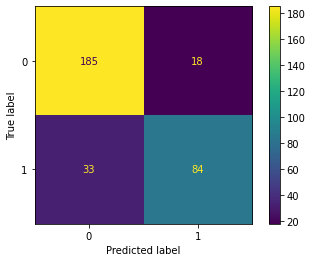

In [71]:
matriz_confusao = confusion_matrix(y, y_previsto_final)
display_matriz_confusao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
display_matriz_confusao.plot(), matriz_confusao

2. Acurácia

In [52]:
acc_logit = accuracy_score(y, y_previsto_final)
print('A acurácia do nosso modelo Logit é de: {}%'.format(round((acc_logit*100), 2)))

A acurácia do nosso modelo Logit é de: 84.06%


3. Sensibilidade (recall score)

In [53]:
sens_logit = recall_score(y, y_previsto_final)
print('A sensibilidade do nosso modelo Logit é de: {}%'.format(round((sens_logit*100), 2)))

A sensibilidade do nosso modelo Logit é de: 71.79%


4. Especificidade

Seguindo a formula:

$$
\frac{VN}{FP+VN}
$$

In [74]:
especificidade_logit = matriz_confusao[0,0] / (matriz_confusao[0,1] + matriz_confusao[0,0])
print('A especificidade do nosso modelo Logit é de: {}%'.format(round((especificidade_logit*100), 2)))

A especificidade do nosso modelo Logit é de: 91.13%


> Conslusões:

Em termos de **acurácia**, o modelo acerta cerca de 84% das previsões. Ou seja, classifica corretamente 84% das observações verdadeiras positivas e verdadeiras negativas.

Por outro lado, a sensibilidade (*recall*) se trata da capacidade do modelo de prever e acertar quem realmente abandonou a escola. Essa métrica é importante para essa natureza do problema, principalmente porque o foco dos gestores de políticas é evitar que os alunos abandonem, ou seja, atuar para reduzir a ocorrência de verdadeiros positivos. Nesse caso, em relação a acurácia, a métrica cai para o valor de 71.8%, o que indica uma tendência do modelo a identificar os verdadeiros negativos com maior facilidade. 

Por fim, a especificidade indica a capacidade do modelo de identificar os verdadeiros negativos, no caso, prever de maneira correta os alunos que não abandonaram. Com um resultado de 91.13%, temos mais um indício além do apresentado pela sensibilidade, de que o modelo tem maior facilidade de identificar os alunos nesse caso.

Dessa forma, para buscar reduzir as taxas de evasão, seria interessante melhorarmos o modelo em termos de sensibilidade, para identificar com mais precisão os casos mais críticos de interesse: prever que vai abandonar com maior precisão, e atuar para evitar o abandono a partir dos resultados do modelo. 

# Questão 2)

## a)

Solucionando em duas etapas:

- Calcular o erro de previsão em agosto;

- Assumimos que o erro de previsão de agosto seria o erro irredutível da previsão pelo modelo, e por isso, somá-lo ao resultado da previsão para os meses seguintes.

In [87]:
y_ago = 0.7 + (0.15 * 8) + (0.3 * 12) + (0.1 * 10)
erro_ago = 11 - y_ago
print('Agosto previsto: {}. Agosto realizado: {}. Agosto erro: {}'.format(y_ago, (y_ago + erro_ago), erro_ago))

Agosto previsto: 6.5. Agosto realizado: 11.0. Agosto erro: 4.5


In [88]:
y_set = 0.7 + (0.15 * 11) + (0.3 * 8) + (0.1 * 12) + erro_ago
print('Setembro previsto: {}'.format(round(y_set, 2)))

Setembro previsto: 10.45


In [89]:
y_out = 0.7 + (0.15 * y_set) + (0.3 * 11) + (0.1 * 8) + erro_ago
print('Outubro previsto: {}'.format(round(y_out, 2)))

Outubro previsto: 10.87


In [90]:
y_nov = 0.7 + (0.15 * y_out) + (0.3 * y_set) + (0.1 * 11) + erro_ago
print('Novembro previsto: {}'.format(round(y_nov, 2)))

Novembro previsto: 11.07


In [91]:
y_dez = 0.7 + (0.15 * y_nov) + (0.3 * y_out) + (0.1 * y_set) + erro_ago
print('Dezembro previsto: {}'.format(round(y_dez, 2)))

Dezembro previsto: 11.17


## b) 

In [60]:
serie_temp = pd.read_csv('../dados-listas/series_temporais.csv')
serie_temp.columns = ['t', 'x']
serie_temp

,t,x
0,1,0.000000
1,2,-0.929209
2,3,-1.648174
3,4,-2.564998
4,5,-1.803053
...,...,...
196,197,-0.124080
197,198,-2.223323
198,199,-2.863299
199,200,-3.892119


Verificando a estacionaridade:

1. Análise gráfica;

2. Análise da função e autocorrelação;

3. Teste de raiz unitária (DF ou ADF).

b.1)

<AxesSubplot:xlabel='t', ylabel='x'>

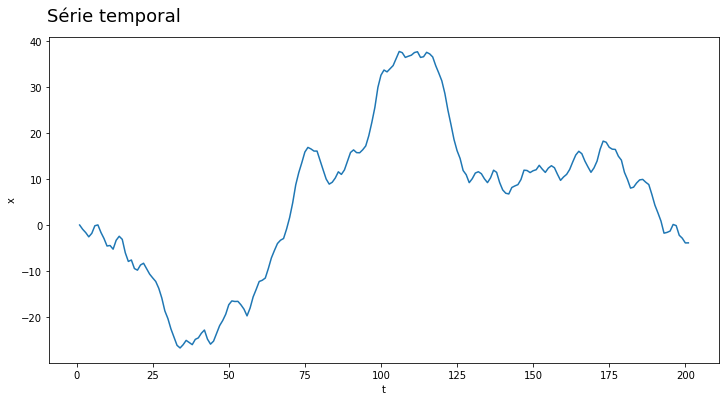

In [61]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Série temporal', fontsize = 18, x = 0.2, y = 0.95)
sns.lineplot(x = 't', y = 'x', data = serie_temp)

b.2)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

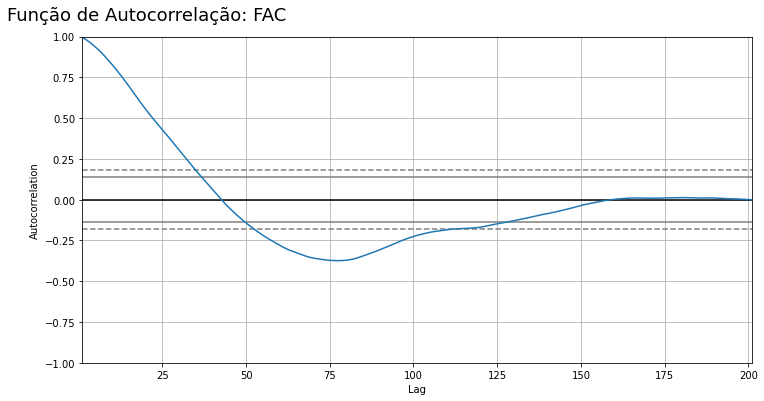

In [62]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Função de Autocorrelação: FAC', fontsize=18, x=0.2, y=0.95)
autocorrelation_plot(serie_temp.x)

C:\Users\henri\AppData\Local\Temp/ipykernel_17836/11761211.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(serie_temp.x).show()


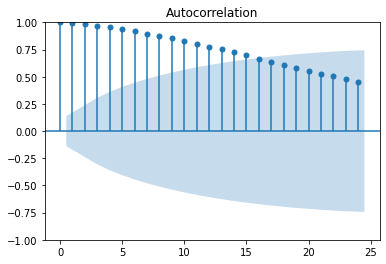

In [63]:
plot_acf(serie_temp.x).show()

b.3)

In [96]:
adf_test = adfuller(serie_temp.x)
print('pvalor = {}'.format(round(adf_test[1], 4)))

pvalor = 0.6196


> **Conclusão:** ao avaliarmos a série temporal pelos três procedimentos sugeridos, podemos concluir que a série é não estacionária. As principais evidência são a função de autocorrelação, dado que a correlação de x com seus valores passados decai de forma relativamente lenta, e o teste ADF, que com um p-valor = 0.62 nos indica que podemos rejeitar a hipótese nula de que a série é estacionária.

## c) 

In [65]:
cambio = pd.read_csv('../dados-listas/questao_reg_cambio.csv')
importacao = pd.read_csv('../dados-listas/questao_reg_importacao.csv')
cambio.columns = ['t_cambio', 'cambio']
importacao.columns = ['t', 'importacao']

In [66]:
importacao_cambio = pd.concat([importacao, cambio], axis = 1)
importacao_cambio.drop('t_cambio', axis = 1, inplace = True)
importacao_cambio

,t,importacao,cambio
0,1,3568.670866,1.8016
1,2,4047.487234,1.7677
2,3,4451.754444,1.7465
3,4,3995.117237,1.8059
4,5,4700.249446,1.8258
...,...,...,...
145,146,16321.658320,1.7086
146,147,18886.745170,1.8215
147,148,18686.725250,1.8912
148,149,20253.056330,2.0217


In [67]:
reg_sem_tendencia = smf.ols('importacao ~ cambio',
                             data = importacao_cambio)
results_reg_sem_tendencia = reg_sem_tendencia.fit()
print(results_reg_sem_tendencia.summary())

                            OLS Regression Results                            
Dep. Variable:             importacao   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     122.8
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           3.74e-21
Time:                        10:47:21   Log-Likelihood:                -1452.7
No. Observations:                 150   AIC:                             2909.
Df Residuals:                     148   BIC:                             2915.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.403e+04   1379.666     17.418      0.0

In [68]:
reg_com_tendencia = smf.ols('importacao ~ cambio + t',
                             data = importacao_cambio)
results_reg_com_tendencia = reg_com_tendencia.fit()
print(results_reg_com_tendencia.summary())

                            OLS Regression Results                            
Dep. Variable:             importacao   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     471.2
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           1.16e-64
Time:                        10:47:22   Log-Likelihood:                -1347.8
No. Observations:                 150   AIC:                             2702.
Df Residuals:                     147   BIC:                             2711.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8062.8185   1020.614      7.900      0.0

Ao comparar as duas regressões, com ou sem tendência, podemos dizer que a regressão válida deve considerar a tendência de crescimento do fluxo de importações ao lon.go do tempo. Podemos observar esse efeito pelo coeficiente da variável tempo positivo e significante estatísticamente (92.32) e também pela diferença no parâmetro estimado para a taxa de câmbio.

Logo, a regressão válida deve conter o componente de tendência.

## d) 

Vamos considerar o seguinte modelo para resolver as questões:

$$
y_t = 0.7 + 0.15x_t + 0.3x_{t-1} + \epsilon_t
$$

### a.

Podemos calcular o efeito da seguinte forma:

$$
\frac{\partial y_t}{\partial x_t} = 0.15
$$

Uma variação unitária em $x_t$ faz com que $y_t$ aumente em 0.15.

### b. 

Podemos calcular o efeito da seguinte forma:

$$
\frac{\partial y_{t+2}}{\partial x_t} = 0
$$

Uma variação unitária em $x_t$ faz com que $y_{t+2}$ aumente em 0, dado que o efeito temporário de $x_t$ não é mais incorporado se avançarmos duas vezes no tempo.

### c.

Podemos calcular os efeitos permanentes da seguinte forma:

#### (i)

$$
\frac{\partial y_t}{\partial x_t} = 0.15
$$

Uma variação permanente em $x_t$ faz com que $y_t$ aumente em 0.15.

#### (ii)

$$
\frac{\partial y_{t+1}}{\partial x_{t+1}} + \frac{\partial y_{t+1}}{\partial x_t} = 0.15 + 0.3 = 0.45
$$

Uma variação permanente em $x_t$ faz com que $y_{t+1}$ aumente em 0.45.

#### (iii)

$$
\frac{\partial y_{t+2}}{\partial x_{t+2}} + \frac{\partial y_{t+2}}{\partial x_{t+1}} + \frac{\partial y_{t+2}}{\partial x_t} = 0.15 + 0.3 + 0 = 0.45
$$

Uma variação permanente em $x_t$ faz com que $y_{t+2}$ aumente em 0.45.


## e)

#### a. 

Dado o modelo:

$$
y_t = 0.7 + 0.15y_{t-1} + 0.3x_t + \epsilon
$$

Para calcularmos o impacto de uma variação temporária de $x_t$ sobre $y_t$, realizamos a derivada parcial de $x_t$ sobre $y_t$:

$$
\frac{\partial y_{t}}{\partial x_t} = 0.3
$$

Dessa forma, uma variação temporária em $x_t$ provoca uma variação de 0.3 em $y_t$.

#### b. 

Dado o modelo:

$$
y_t = 0.7 + 0.15y_{t-1} + 0.3x_t + \epsilon
$$

O impacto de uma variação temporária de $x_𝑡$ sobre $y{𝑡+1}$ é dado por:

$$
\frac{\partial y_{t + 1}}{\partial x_t} = 0.15 * 0.3 + 0 = 0.045
$$

Dessa forma, uma variação temporária em $x_t$ provoca uma variação de 0.045 em $y_{t+1}$.